In [1]:
#define path
wesley_ds = "/files"
kaggle_ds = "/archive/Data/genres_original"
main_path = "../raw_dataset"

In [2]:
#choose the dataset
chooser = wesley_ds

In [3]:
DATASET_PATH = main_path+chooser
# DATASET_PATH = "../../../Music"
JSON_PATH = '../pr_dataset/n_wesley_60.json'
SAMPLE_RATE = sr =  22050
DURATION = 30 #measured in seconds 
SAMPLES_PER_TRACK = SAMPLE_RATE*DURATION

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(main_path+chooser):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        print(filename)
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


01 Castion _ Dylerz feat. NEAD - Take Me (Ex.mp3
010. DJ Snake feat. Lauv - A Different Way (.mp3
03 Down On Love (Moksi Remix).mp3
04 Kill It.mp3
04. Tujamo - One On One (Vion Konger Remix) .mp3
10. Sikdope - Snakes (Extended Mix).mp3
10161324_The_Game_Original_Mix.mp3
10582469_Antidote_Extended_Mix.mp3
11073789_Get_Down_Extended_Mix.mp3
205. Diplo And Autoerotique - Waist Time.mp3
4B _ Teez - Whistle (Schade Remix).mp3
9416773_No_More_Original_Mix.mp3
Afrojack - Bassride (Extended Mix) #BassHous.mp3
Albin Myers feat. Bud Stankz - Walking On Wa.mp3
Alenn, NEOX - Spiral [www.slider.kz].mp3
Alesso - Falling (Brohug remix) (125)-1.mp3
Artelax - Crank It (Extended Mix).mp3
AWIIN - Brotality (Extended Mix).mp3
Bart B More - Throwback [www.slider.kz].mp3
Bassride - Congratulations [DemoDrop].mp3
Basstrick - Ghost Buster (Original Mix) [sic.mp3
Be (BROHUG Remix).mp3
Boombox-Cartel---Moon-Love-ft.-Nessly-_Tha-B.mp3
Brohug  - Ambush (Extended Mix) .mp3
BROHUG - Paparazzi (Extended Mix) [www.sl

01-Claes-Rosen-Daydreaming.mp3
06. I Want Your Attention.mp3
13006416_Not_Ya__LaLaLa___Extended_Mix__Orig.mp3
13176573_5PM_Jannis_Block_Extended_Remix.mp3
13490344_The_Bender_Club_Edit.mp3
Alesso _ SUMR CAMP - In The Middle (Extended.mp3
Andrea Oliva - Piano Not Piano (Original Mi.aiff
ANOTR - Help [www.slider.kz].mp3
Breathe Carolina - Drive [www.slider.kz].mp3
Breathe Carolina - Think About You [www.slid.mp3
Breathe Carolina - Too Good [www.slider.kz].mp3
Cashio - Dancing (With Me) (Extended Mix) [w.mp3
David Guetta, Raye - Stay (Don_t Go Away) (E.mp3
Disclosure - Latch (Robin Tayger Remix).wav
Guy Burns - Lie Machine [www.slider.kz].mp3
HADES - Keeps Me High (Hanga Remix) Extended.wav
Hector Couto - Right on Time [www.slider.kz].mp3
Hot Mustard - Freakin_ Girl (Bayslick Remix).mp3
Joe Stone - Nothing Else (When I Think Of Yo.mp3
Joe Stone, Monn - Loaded Gun (Extended Mix) .mp3
Johan S, Andme, Bastian - I Got Something [w.mp3
Khillaudio - Swingin Times 22 Weeks Remix-ww.mp3
Leon Bene

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import librosa.display
from IPython.display import Audio
# from tqdm import tqdm 
from sklearn.model_selection import train_test_split, TimeSeriesSplit
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, LSTM, Bidirectional, GRU, BatchNormalization, LeakyReLU
from tensorflow.keras.utils import to_categorical
import os
import math
import json
import random

In [11]:
def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=4084, hop_length=1024, num_segments=10):
    #dictionary to store data
    data = {
        'mapping' : [],
        'mfcc' : [],
        'labels' : []
    }
    
    count = 0 # To keep track of our progress
    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments) 
    expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)
    
    #Loop through all the genres
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        
        #ensure that we're not at the root level
        if dirpath not in dataset_path:

            #save the semantic label
            dirpath_components = dirpath.split('/')
            semantic_label = dirpath_components[-1]
            data['mapping'].append(semantic_label)
            print('\nProcessing {}'.format(semantic_label))
            
            #process files for a specific genre 
            for f in filenames:
#                 if f.endswith('.wav') and f != 'jazz.00054.wav': # Since file jazz.00054.wav is an empty file
                if True: # Since file jazz.00054.wav is an empty file
                    file_path = os.path.join(dirpath,f)
                    
                    #loading the audio file 
                    # we are using the soundfile library since it is faster than librosa
                    signal, sr = librosa.load(file_path) # len(signal) = 661794  # sr is 22050 by default 
#                     midptr = int(signal.shape[0]/2)
#                     bptr = midptr - (SAMPLE_RATE*DURATION) #set as OFFSET
#                     hptr = midptr + (SAMPLE_RATE*duration)
                    #print(signal,sr)
                    #process segments extracting mfcc and storing data
                    for s in range(num_segments): 
                        # Since num_segments is defined as 5. Every 30 sec file is divided into 5 segments of length 6sec 
                        # Start sample would keep track of the index of the first element of each 6 second batch
                        # finish sample would keep track of the index of the last element of each 6 second batch
                        # And then with the help of python's slice functionality we will extract that 6 second batch from every 30 sec signal
                        start_sample = num_samples_per_segment * s   
                        finish_sample = num_samples_per_segment + start_sample
                        
                        # Next, we will pass each segment in order to extract MFCC. The parameter n_mfcc defines the number of mfcc 
                        # we need to extract, Usually n_mfcc is set b/w 13 to 40. The other parameters n_fft and hop length are 
                        # indivisual topics of discussion. Will be discussed in later Notbooks. 
                        mfcc = librosa.feature.mfcc(signal[start_sample : finish_sample],
                                                   sr = sr,
                                                   n_fft = n_fft,
                                                   n_mfcc = n_mfcc,
                                                   hop_length = hop_length)

                        mfcc = mfcc.T
                        # store mfcc for segment if it has the expected length
                        if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                            print(mfcc.shape)
                            data['mfcc'].append(mfcc.tolist())
                            data['labels'].append(i)
                            print('Processing {}, segment:{}'.format(file_path, s))
                            count += 1
                            print(count)
    with open(json_path, 'w') as fp:
        json.dump(data, fp, indent=4)

In [12]:
# Let's run the above function 
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=5)


Processing files\BASS HOUSE
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\01 Castion _ Dylerz feat. NEAD - Take Me (Ex.mp3, segment:0
1
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\01 Castion _ Dylerz feat. NEAD - Take Me (Ex.mp3, segment:1
2
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\01 Castion _ Dylerz feat. NEAD - Take Me (Ex.mp3, segment:2
3
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\01 Castion _ Dylerz feat. NEAD - Take Me (Ex.mp3, segment:3
4
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\01 Castion _ Dylerz feat. NEAD - Take Me (Ex.mp3, segment:4
5
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\010. DJ Snake feat. Lauv - A Different Way (.mp3, segment:0
6
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\010. DJ Snake feat. Lauv - A Different Way (.mp3, segment:1
7
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\010. DJ Snake feat. Lauv - A Different Way (.mp3, segment:2
8
(130, 13)
Processing ../raw_dataset/files\BASS HOUS

(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Alesso - Falling (Brohug remix) (125)-1.mp3, segment:2
78
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Alesso - Falling (Brohug remix) (125)-1.mp3, segment:3
79
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Alesso - Falling (Brohug remix) (125)-1.mp3, segment:4
80
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Artelax - Crank It (Extended Mix).mp3, segment:0
81
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Artelax - Crank It (Extended Mix).mp3, segment:1
82
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Artelax - Crank It (Extended Mix).mp3, segment:2
83
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Artelax - Crank It (Extended Mix).mp3, segment:3
84
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Artelax - Crank It (Extended Mix).mp3, segment:4
85
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\AWIIN - Brotality (Extended Mix).mp3, segment:0
86
(130, 13)
Processing ../raw_dataset/fi

(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\D.O.D - Honey [www.slider.kz].mp3, segment:2
153
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\D.O.D - Honey [www.slider.kz].mp3, segment:3
154
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\D.O.D - Honey [www.slider.kz].mp3, segment:4
155
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Diplo _ Autoerotique x Benny Benassi - Waist.mp3, segment:0
156
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Diplo _ Autoerotique x Benny Benassi - Waist.mp3, segment:1
157
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Diplo _ Autoerotique x Benny Benassi - Waist.mp3, segment:2
158
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Diplo _ Autoerotique x Benny Benassi - Waist.mp3, segment:3
159
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Diplo _ Autoerotique x Benny Benassi - Waist.mp3, segment:4
160
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\DJ Snake _ Sheck Wes - Enzo (feat. Offset, 2.mp3, segmen

(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Gerald le Funk _ Ricky West - I Feel Like.mp3, segment:1
227
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Gerald le Funk _ Ricky West - I Feel Like.mp3, segment:2
228
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Gerald le Funk _ Ricky West - I Feel Like.mp3, segment:3
229
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Gerald le Funk _ Ricky West - I Feel Like.mp3, segment:4
230
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Guy Arthur - Get Money (feat. TITUS) [Extend.mp3, segment:0
231
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Guy Arthur - Get Money (feat. TITUS) [Extend.mp3, segment:1
232
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Guy Arthur - Get Money (feat. TITUS) [Extend.mp3, segment:2
233
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Guy Arthur - Get Money (feat. TITUS) [Extend.mp3, segment:3
234
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Guy Arthur - Get Money 

(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Loopers - Drummachine (Original Mix) [SWM].mp3, segment:0
301
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Loopers - Drummachine (Original Mix) [SWM].mp3, segment:1
302
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Loopers - Drummachine (Original Mix) [SWM].mp3, segment:2
303
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Loopers - Drummachine (Original Mix) [SWM].mp3, segment:3
304
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Loopers - Drummachine (Original Mix) [SWM].mp3, segment:4
305
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\LOUD ABOUT US! x ATRIP - Bassline Spinner.wav, segment:0
306
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\LOUD ABOUT US! x ATRIP - Bassline Spinner.wav, segment:1
307
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\LOUD ABOUT US! x ATRIP - Bassline Spinner.wav, segment:2
308
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\LOUD ABOUT US! x ATRIP - Bassl

(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Moksi, Ricky West, Dusty - Belter [www.slide.mp3, segment:3
374
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Moksi, Ricky West, Dusty - Belter [www.slide.mp3, segment:4
375
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\MRZY - Bootyshake (Original Mix).mp3, segment:0
376
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\MRZY - Bootyshake (Original Mix).mp3, segment:1
377
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\MRZY - Bootyshake (Original Mix).mp3, segment:2
378
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\MRZY - Bootyshake (Original Mix).mp3, segment:3
379
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\MRZY - Bootyshake (Original Mix).mp3, segment:4
380
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\MYLØ - Dealer [www.slider.kz].mp3, segment:0
381
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\MYLØ - Dealer [www.slider.kz].mp3, segment:1
382
(130, 13)
Processing ../raw_dataset/f

(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Showtek Sonny Wilson Doctor P  Flux Pavilion.mp3, segment:0
451
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Showtek Sonny Wilson Doctor P  Flux Pavilion.mp3, segment:1
452
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Showtek Sonny Wilson Doctor P  Flux Pavilion.mp3, segment:2
453
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Showtek Sonny Wilson Doctor P  Flux Pavilion.mp3, segment:3
454
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Showtek Sonny Wilson Doctor P  Flux Pavilion.mp3, segment:4
455
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Siberian Express x Richie Loop - Xpress (Ori.wav, segment:0
456
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Siberian Express x Richie Loop - Xpress (Ori.wav, segment:1
457
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Siberian Express x Richie Loop - Xpress (Ori.wav, segment:2
458
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Siberian Ex

(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\twoloud _ MureKian - Free (Original Mix) [ww.mp3, segment:2
523
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\twoloud _ MureKian - Free (Original Mix) [ww.mp3, segment:3
524
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\twoloud _ MureKian - Free (Original Mix) [ww.mp3, segment:4
525
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Valy Mo - Brain Rock [www.slider.kz].mp3, segment:0
526
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Valy Mo - Brain Rock [www.slider.kz].mp3, segment:1
527
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Valy Mo - Brain Rock [www.slider.kz].mp3, segment:2
528
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Valy Mo - Brain Rock [www.slider.kz].mp3, segment:3
529
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\Valy Mo - Brain Rock [www.slider.kz].mp3, segment:4
530
(130, 13)
Processing ../raw_dataset/files\BASS HOUSE\WATEVA - Ber Zer Ker [www.slider.kz].mp3, segment:0

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 H2HB - Don_t Stop (Extended Mix).mp3, segment:1
597
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 H2HB - Don_t Stop (Extended Mix).mp3, segment:2
598
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 H2HB - Don_t Stop (Extended Mix).mp3, segment:3
599
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 H2HB - Don_t Stop (Extended Mix).mp3, segment:4
600
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 Jack _ James - Aftermath (Extended Mix).mp3, segment:0
601
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 Jack _ James - Aftermath (Extended Mix).mp3, segment:1
602
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 Jack _ James - Aftermath (Extended Mix).mp3, segment:2
603
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 Jack _ James - Aftermath (Extended Mix).mp3, segment:3
604
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 Jack _ James - Aftermath (Extended Mix).mp3, segment:4
605
(130, 13)
P

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 Stayer - Clap (Extended Mix).mp3, segment:0
671
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 Stayer - Clap (Extended Mix).mp3, segment:1
672
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 Stayer - Clap (Extended Mix).mp3, segment:2
673
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 Stayer - Clap (Extended Mix).mp3, segment:3
674
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 Stayer - Clap (Extended Mix).mp3, segment:4
675
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 STVW _ VillanZ - Lean Back (Extended Mix).mp3, segment:0
676
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 STVW _ VillanZ - Lean Back (Extended Mix).mp3, segment:1
677
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 STVW _ VillanZ - Lean Back (Extended Mix).mp3, segment:2
678
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\01 STVW _ VillanZ - Lean Back (Extended Mix).mp3, segment:3
679
(130, 13)
Processing ../raw_da

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\10864554_Mind_Extended_Mix.mp3, segment:2
748
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\10864554_Mind_Extended_Mix.mp3, segment:3
749
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\10864554_Mind_Extended_Mix.mp3, segment:4
750
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\11. Kallau _ Bitas - Dancefloor vs KE�HA - T.mp3, segment:0
751
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\11. Kallau _ Bitas - Dancefloor vs KE�HA - T.mp3, segment:1
752
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\11. Kallau _ Bitas - Dancefloor vs KE�HA - T.mp3, segment:2
753
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\11. Kallau _ Bitas - Dancefloor vs KE�HA - T.mp3, segment:3
754
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\11. Kallau _ Bitas - Dancefloor vs KE�HA - T.mp3, segment:4
755
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\11514044_Hard_Extended_Mix.mp3, segment:0
756
(130, 13)
Processing ../raw_dataset/f

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\7019310_Pounce_Original_Mix.mp3, segment:3
824
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\7019310_Pounce_Original_Mix.mp3, segment:4
825
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\9044832_Be_Your_Love_Again__feat__Esther__Or.mp3, segment:0
826
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\9044832_Be_Your_Love_Again__feat__Esther__Or.mp3, segment:1
827
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\9044832_Be_Your_Love_Again__feat__Esther__Or.mp3, segment:2
828
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\9044832_Be_Your_Love_Again__feat__Esther__Or.mp3, segment:3
829
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\9044832_Be_Your_Love_Again__feat__Esther__Or.mp3, segment:4
830
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Adrian Moore - Top Boy (Extended Mix).mp3, segment:0
831
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Adrian Moore - Top Boy (Extended Mix).mp3, segment:1
832
(130, 13)
Pro

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Armin van Buuren _ Jamis - Boom Boom (Extend.mp3, segment:2
898
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Armin van Buuren _ Jamis - Boom Boom (Extend.mp3, segment:3
899
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Armin van Buuren _ Jamis - Boom Boom (Extend.mp3, segment:4
900
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Armin van Buuren, W_W, Dimitri Vegas _ Like .mp3, segment:0
901
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Armin van Buuren, W_W, Dimitri Vegas _ Like .mp3, segment:1
902
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Armin van Buuren, W_W, Dimitri Vegas _ Like .mp3, segment:2
903
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Armin van Buuren, W_W, Dimitri Vegas _ Like .mp3, segment:3
904
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Armin van Buuren, W_W, Dimitri Vegas _ Like .mp3, segment:4
905
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Axwell _ Ingrosso - More Than

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\BLACKPINK - How You Like That (KAZERR Bootle.wav, segment:0
971
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\BLACKPINK - How You Like That (KAZERR Bootle.wav, segment:1
972
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\BLACKPINK - How You Like That (KAZERR Bootle.wav, segment:2
973
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\BLACKPINK - How You Like That (KAZERR Bootle.wav, segment:3
974
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\BLACKPINK - How You Like That (KAZERR Bootle.wav, segment:4
975
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Blasterjaxx - No Sleep (Extended Mix) [www.s.mp3, segment:0
976
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Blasterjaxx - No Sleep (Extended Mix) [www.s.mp3, segment:1
977
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Blasterjaxx - No Sleep (Extended Mix) [www.s.mp3, segment:2
978
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Blasterjaxx - No Sleep (Exten

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Chainsmokers - Don_t Let Me Down (Riggi _26 .mp3, segment:4
1045
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Chico Rose _ D3FAI - Jackpot (Extended Mix) .mp3, segment:0
1046
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Chico Rose _ D3FAI - Jackpot (Extended Mix) .mp3, segment:1
1047
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Chico Rose _ D3FAI - Jackpot (Extended Mix) .mp3, segment:2
1048
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Chico Rose _ D3FAI - Jackpot (Extended Mix) .mp3, segment:3
1049
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Chico Rose _ D3FAI - Jackpot (Extended Mix) .mp3, segment:4
1050
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Chocolate Puma - Make _#39_M Bounce (Extende.mp3, segment:0
1051
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Chocolate Puma - Make _#39_M Bounce (Extende.mp3, segment:1
1052
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Chocolate Puma - Make

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Dimitri Vegas _ Like Mike vs. Nicky Romero -.mp3, segment:1
1117
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Dimitri Vegas _ Like Mike vs. Nicky Romero -.mp3, segment:2
1118
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Dimitri Vegas _ Like Mike vs. Nicky Romero -.mp3, segment:3
1119
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Dimitri Vegas _ Like Mike vs. Nicky Romero -.mp3, segment:4
1120
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Dimitri Vegas, Hardwell _ Like Mike - Unity .mp3, segment:0
1121
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Dimitri Vegas, Hardwell _ Like Mike - Unity .mp3, segment:1
1122
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Dimitri Vegas, Hardwell _ Like Mike - Unity .mp3, segment:2
1123
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Dimitri Vegas, Hardwell _ Like Mike - Unity .mp3, segment:3
1124
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Dimitri Vegas, Hardwe

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\FEEDSON feat. RAGG - On The Floor (Extended .mp3, segment:4
1190
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\FEZZA _ SIZE-S - Earthbound (Original Mix) [.mp3, segment:0
1191
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\FEZZA _ SIZE-S - Earthbound (Original Mix) [.mp3, segment:1
1192
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\FEZZA _ SIZE-S - Earthbound (Original Mix) [.mp3, segment:2
1193
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\FEZZA _ SIZE-S - Earthbound (Original Mix) [.mp3, segment:3
1194
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\FEZZA _ SIZE-S - Earthbound (Original Mix) [.mp3, segment:4
1195
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\final.mp3, segment:0
1196
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\final.mp3, segment:1
1197
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\final.mp3, segment:2
1198
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\final.mp3, segment:3
1

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Hardwell _ Afrojack - Hands Up (Extended Mix.mp3, segment:3
1264
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Hardwell _ Afrojack - Hands Up (Extended Mix.mp3, segment:4
1265
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Hardwell _ Blasterjaxx feat. Mitch Crown - B.mp3, segment:0
1266
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Hardwell _ Blasterjaxx feat. Mitch Crown - B.mp3, segment:1
1267
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Hardwell _ Blasterjaxx feat. Mitch Crown - B.mp3, segment:2
1268
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Hardwell _ Blasterjaxx feat. Mitch Crown - B.mp3, segment:3
1269
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Hardwell _ Blasterjaxx feat. Mitch Crown - B.mp3, segment:4
1270
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Hardwell _ Kura - Calavera (Jake Sgarlato Re.mp3, segment:0
1271
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Hardwell _ Kura - Cal

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\I.GOT.U x KOFM - Odesi (Original Mix) [www.s.mp3, segment:0
1336
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\I.GOT.U x KOFM - Odesi (Original Mix) [www.s.mp3, segment:1
1337
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\I.GOT.U x KOFM - Odesi (Original Mix) [www.s.mp3, segment:2
1338
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\I.GOT.U x KOFM - Odesi (Original Mix) [www.s.mp3, segment:3
1339
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\I.GOT.U x KOFM - Odesi (Original Mix) [www.s.mp3, segment:4
1340
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\ididid.mp3, segment:0
1341
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\ididid.mp3, segment:1
1342
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\ididid.mp3, segment:2
1343
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\ididid.mp3, segment:3
1344
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\ididid.mp3, segment:4
1345
(130, 13)
Processing ../raw_da

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\KEVU _ Bad Nelson ft. Richie Loop - Sound Th.wav, segment:4
1410
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\KEVU _ Giftback - The Citadel (Extended Mix).mp3, segment:0
1411
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\KEVU _ Giftback - The Citadel (Extended Mix).mp3, segment:1
1412
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\KEVU _ Giftback - The Citadel (Extended Mix).mp3, segment:2
1413
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\KEVU _ Giftback - The Citadel (Extended Mix).mp3, segment:3
1414
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\KEVU _ Giftback - The Citadel (Extended Mix).mp3, segment:4
1415
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\KIIDA - Balangala (Afrojack Edit) (Extended .mp3, segment:0
1416
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\KIIDA - Balangala (Afrojack Edit) (Extended .mp3, segment:1
1417
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\KIIDA - Balangala (Af

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Luke Bond - Clockwork [www.slider.kz].mp3, segment:3
1484
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Luke Bond - Clockwork [www.slider.kz].mp3, segment:4
1485
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Maddix - Electric (Extended Mix) [www.slider.mp3, segment:0
1486
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Maddix - Electric (Extended Mix) [www.slider.mp3, segment:1
1487
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Maddix - Electric (Extended Mix) [www.slider.mp3, segment:2
1488
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Maddix - Electric (Extended Mix) [www.slider.mp3, segment:3
1489
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Maddix - Electric (Extended Mix) [www.slider.mp3, segment:4
1490
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Maddix - Existence (Extended Mix) [www.slide.mp3, segment:0
1491
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Maddix - Existence (Extended Mix) [

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Merzo - Crypto [www.slider.kz].mp3, segment:0
1556
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Merzo - Crypto [www.slider.kz].mp3, segment:1
1557
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Merzo - Crypto [www.slider.kz].mp3, segment:2
1558
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Merzo - Crypto [www.slider.kz].mp3, segment:3
1559
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Merzo - Crypto [www.slider.kz].mp3, segment:4
1560
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Mightyfools - Ravenation (Original Mix) [www.mp3, segment:0
1561
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Mightyfools - Ravenation (Original Mix) [www.mp3, segment:1
1562
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Mightyfools - Ravenation (Original Mix) [www.mp3, segment:2
1563
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Mightyfools - Ravenation (Original Mix) [www.mp3, segment:3
1564
(130, 13)
Processing ../ra

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Neil Bronson Vs. Skytune - Wild (Original Mi.mp3, segment:2
1628
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Neil Bronson Vs. Skytune - Wild (Original Mi.mp3, segment:3
1629
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Neil Bronson Vs. Skytune - Wild (Original Mi.mp3, segment:4
1630
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Neil Bronson _ Axeonic - Feel The Force (Ext.mp3, segment:0
1631
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Neil Bronson _ Axeonic - Feel The Force (Ext.mp3, segment:1
1632
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Neil Bronson _ Axeonic - Feel The Force (Ext.mp3, segment:2
1633
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Neil Bronson _ Axeonic - Feel The Force (Ext.mp3, segment:3
1634
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Neil Bronson _ Axeonic - Feel The Force (Ext.mp3, segment:4
1635
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\New Blood_ _ RCOP_ - 

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Quintino - Inferno (Extended Mix) [www.slide.mp3, segment:4
1700
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Quintino - Underground (Extended Mix) [www.s.mp3, segment:0
1701
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Quintino - Underground (Extended Mix) [www.s.mp3, segment:1
1702
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Quintino - Underground (Extended Mix) [www.s.mp3, segment:2
1703
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Quintino - Underground (Extended Mix) [www.s.mp3, segment:3
1704
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Quintino - Underground (Extended Mix) [www.s.mp3, segment:4
1705
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Quintino Hardwell - Woest vs Hammish DEEPSH.aiff, segment:0
1706
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Quintino Hardwell - Woest vs Hammish DEEPSH.aiff, segment:1
1707
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Quintino Hardwell - W

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Ryos feat. Envy Monroe - Discover Love (Sabe.mp3, segment:1
1772
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Ryos feat. Envy Monroe - Discover Love (Sabe.mp3, segment:2
1773
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Ryos feat. Envy Monroe - Discover Love (Sabe.mp3, segment:3
1774
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Ryos feat. Envy Monroe - Discover Love (Sabe.mp3, segment:4
1775
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Ryos, Sara Skinner - Only You [www.slider.kz.mp3, segment:0
1776
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Ryos, Sara Skinner - Only You [www.slider.kz.mp3, segment:1
1777
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Ryos, Sara Skinner - Only You [www.slider.kz.mp3, segment:2
1778
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Ryos, Sara Skinner - Only You [www.slider.kz.mp3, segment:3
1779
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Ryos, Sara Skinner - 

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Sophie Francis - Lose My Mind (Extended Mix).mp3, segment:4
1845
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Steff Da Campo _ David Puentez - Everybody (.mp3, segment:0
1846
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Steff Da Campo _ David Puentez - Everybody (.mp3, segment:1
1847
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Steff Da Campo _ David Puentez - Everybody (.mp3, segment:2
1848
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Steff Da Campo _ David Puentez - Everybody (.mp3, segment:3
1849
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Steff Da Campo _ David Puentez - Everybody (.mp3, segment:4
1850
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Stephan Tosh, Fatal.V _ SANI - Shake It Down.mp3, segment:0
1851
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Stephan Tosh, Fatal.V _ SANI - Shake It Down.mp3, segment:1
1852
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Stephan Tosh, Fatal.V

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\TECH AWIIN - SWANG (Extended Mix) [04.10.201.mp3, segment:2
1918
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\TECH AWIIN - SWANG (Extended Mix) [04.10.201.mp3, segment:3
1919
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\TECH AWIIN - SWANG (Extended Mix) [04.10.201.mp3, segment:4
1920
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\The Drums (Original Mix).mp3, segment:0
1921
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\The Drums (Original Mix).mp3, segment:1
1922
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\The Drums (Original Mix).mp3, segment:2
1923
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\The Drums (Original Mix).mp3, segment:3
1924
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\The Drums (Original Mix).mp3, segment:4
1925
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\The Riddle Of One Kiss (PuFFcorn Mashup).mp3, segment:0
1926
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\The Riddl

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\TRICKY [Wukileak].mp3, segment:1
1992
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\TRICKY [Wukileak].mp3, segment:2
1993
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\TRICKY [Wukileak].mp3, segment:3
1994
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\TRICKY [Wukileak].mp3, segment:4
1995
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Trompeta DANNIC MASTER V1.wav, segment:0
1996
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Trompeta DANNIC MASTER V1.wav, segment:1
1997
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Trompeta DANNIC MASTER V1.wav, segment:2
1998
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Trompeta DANNIC MASTER V1.wav, segment:3
1999
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Trompeta DANNIC MASTER V1.wav, segment:4
2000
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Trouble (feat. MC Spyder).mp3, segment:0
2001
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Trouble (fe

(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Zedd _ Jasmine Thompson - Funny (Taihei Remi.wav, segment:1
2067
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Zedd _ Jasmine Thompson - Funny (Taihei Remi.wav, segment:2
2068
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Zedd _ Jasmine Thompson - Funny (Taihei Remi.wav, segment:3
2069
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\Zedd _ Jasmine Thompson - Funny (Taihei Remi.wav, segment:4
2070
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\ZINKO - WEK [www.slider.kz].mp3, segment:0
2071
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\ZINKO - WEK [www.slider.kz].mp3, segment:1
2072
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\ZINKO - WEK [www.slider.kz].mp3, segment:2
2073
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\ZINKO - WEK [www.slider.kz].mp3, segment:3
2074
(130, 13)
Processing ../raw_dataset/files\BIG ROOM\ZINKO - WEK [www.slider.kz].mp3, segment:4
2075
(130, 13)
Processing ../raw_dataset/files

(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Breathe Carolina - Too Good [www.slider.kz].mp3, segment:1
2142
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Breathe Carolina - Too Good [www.slider.kz].mp3, segment:2
2143
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Breathe Carolina - Too Good [www.slider.kz].mp3, segment:3
2144
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Breathe Carolina - Too Good [www.slider.kz].mp3, segment:4
2145
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Cashio - Dancing (With Me) (Extended Mix) [w.mp3, segment:0
2146
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Cashio - Dancing (With Me) (Extended Mix) [w.mp3, segment:1
2147
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Cashio - Dancing (With Me) (Extended Mix) [w.mp3, segment:2
2148
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Cashio - Dancing (With Me) (Extended Mix) [w.mp3, segment:3
2149
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Cashio 

(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Low Steppa - Close To Me [www.slider.kz].mp3, segment:1
2212
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Low Steppa - Close To Me [www.slider.kz].mp3, segment:2
2213
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Low Steppa - Close To Me [www.slider.kz].mp3, segment:3
2214
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Low Steppa - Close To Me [www.slider.kz].mp3, segment:4
2215
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Low Steppa - Heard It All Before (Low Steppa.mp3, segment:0
2216
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Low Steppa - Heard It All Before (Low Steppa.mp3, segment:1
2217
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Low Steppa - Heard It All Before (Low Steppa.mp3, segment:2
2218
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Low Steppa - Heard It All Before (Low Steppa.mp3, segment:3
2219
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Low Steppa - Heard 

(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\PuFFcorn _ Showmain - Don_t give up (Kailyu .mp3, segment:2
2283
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\PuFFcorn _ Showmain - Don_t give up (Kailyu .mp3, segment:3
2284
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\PuFFcorn _ Showmain - Don_t give up (Kailyu .mp3, segment:4
2285
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\PuFFcorn _ Showmain - Don_t Give Up Remix Tr.mp3, segment:0
2286
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\PuFFcorn _ Showmain - Don_t Give Up Remix Tr.mp3, segment:1
2287
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\PuFFcorn _ Showmain - Don_t Give Up Remix Tr.mp3, segment:2
2288
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\PuFFcorn _ Showmain - Don_t Give Up Remix Tr.mp3, segment:3
2289
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\PuFFcorn _ Showmain - Don_t Give Up Remix Tr.mp3, segment:4
2290
(130, 13)
Processing ../raw_dataset/files\DEEP HOUSE\Qub

(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\13587149_Click_Original_Mix.mp3, segment:3
2354
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\13587149_Click_Original_Mix.mp3, segment:4
2355
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\21. Guru Josh Projekt vs Blinders and more -.mp3, segment:0
2356
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\21. Guru Josh Projekt vs Blinders and more -.mp3, segment:1
2357
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\21. Guru Josh Projekt vs Blinders and more -.mp3, segment:2
2358
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\21. Guru Josh Projekt vs Blinders and more -.mp3, segment:3
2359
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\21. Guru Josh Projekt vs Blinders and more -.mp3, segment:4
2360
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\48. Dessert vs Bun Up The Basshouse (Pajane .mp3, segment:0
2361
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\48. Desser

(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Carta - Better Not (Extended Mix) [TraxCrate.mp3, segment:2
2423
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Carta - Better Not (Extended Mix) [TraxCrate.mp3, segment:3
2424
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Carta - Better Not (Extended Mix) [TraxCrate.mp3, segment:4
2425
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Carta _ Chocolate Puma - Elderly People (Ext.mp3, segment:0
2426
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Carta _ Chocolate Puma - Elderly People (Ext.mp3, segment:1
2427
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Carta _ Chocolate Puma - Elderly People (Ext.mp3, segment:2
2428
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Carta _ Chocolate Puma - Elderly People (Ext.mp3, segment:3
2429
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Carta _ Chocolate Puma - Elderly People (Ext.mp3, segment:4
2430
(130, 13)
Processing ../raw_data

(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Fisher - Losing It (Dave Winnel _For The Win.mp3, segment:2
2493
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Fisher - Losing It (Dave Winnel _For The Win.mp3, segment:3
2494
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Fisher - Losing It (Dave Winnel _For The Win.mp3, segment:4
2495
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Guy Arthur - Get Money (feat. TITUS) [Extend.mp3, segment:0
2496
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Guy Arthur - Get Money (feat. TITUS) [Extend.mp3, segment:1
2497
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Guy Arthur - Get Money (feat. TITUS) [Extend.mp3, segment:2
2498
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Guy Arthur - Get Money (feat. TITUS) [Extend.mp3, segment:3
2499
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Guy Arthur - Get Money (feat. TITUS) [Extend.mp3, segment:4
2500
(130, 13)
Processing ../raw_data

(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Maddix - Technology (Extended Mix) [www.slid.mp3, segment:0
2561
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Maddix - Technology (Extended Mix) [www.slid.mp3, segment:1
2562
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Maddix - Technology (Extended Mix) [www.slid.mp3, segment:2
2563
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Maddix - Technology (Extended Mix) [www.slid.mp3, segment:3
2564
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Maddix - Technology (Extended Mix) [www.slid.mp3, segment:4
2565
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Madison Mars - Back 2 Underground (Extended .mp3, segment:0
2566
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Madison Mars - Back 2 Underground (Extended .mp3, segment:1
2567
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Madison Mars - Back 2 Underground (Extended .mp3, segment:2
2568
(130, 13)
Processing ../raw_data

(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Ranqz-CGVE-Caught-Up-Extended-Mix-_5f6441757.mp3, segment:3
2629
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Ranqz-CGVE-Caught-Up-Extended-Mix-_5f6441757.mp3, segment:4
2630
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Rattle vs. Hype (New Sound Nation Mashup).mp3, segment:0
2631
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Rattle vs. Hype (New Sound Nation Mashup).mp3, segment:1
2632
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Rattle vs. Hype (New Sound Nation Mashup).mp3, segment:2
2633
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Rattle vs. Hype (New Sound Nation Mashup).mp3, segment:3
2634
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Rattle vs. Hype (New Sound Nation Mashup).mp3, segment:4
2635
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Retrovision - Get Down (Extended Mix) www.li.mp3, segment:0
2636
(130, 13)
Processing ../raw_dataset/files\ELECT

(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Tommy Jayden - Like This (RetroVision Extend.mp3, segment:2
2698
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Tommy Jayden - Like This (RetroVision Extend.mp3, segment:3
2699
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Tommy Jayden - Like This (RetroVision Extend.mp3, segment:4
2700
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Tony Junior _ John Christian - Technoprime (.mp3, segment:0
2701
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Tony Junior _ John Christian - Technoprime (.mp3, segment:1
2702
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Tony Junior _ John Christian - Technoprime (.mp3, segment:2
2703
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Tony Junior _ John Christian - Technoprime (.mp3, segment:3
2704
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Tony Junior _ John Christian - Technoprime (.mp3, segment:4
2705
(130, 13)
Processing ../raw_data

(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Zonderling _ Magnificence - Apart [www.slide.mp3, segment:1
2767
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Zonderling _ Magnificence - Apart [www.slide.mp3, segment:2
2768
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Zonderling _ Magnificence - Apart [www.slide.mp3, segment:3
2769
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Zonderling _ Magnificence - Apart [www.slide.mp3, segment:4
2770
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Zookëper - House Phone (Extended Mix) (WCM) .mp3, segment:0
2771
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Zookëper - House Phone (Extended Mix) (WCM) .mp3, segment:1
2772
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Zookëper - House Phone (Extended Mix) (WCM) .mp3, segment:2
2773
(130, 13)
Processing ../raw_dataset/files\ELECTRO HOUSE\Zookëper - House Phone (Extended Mix) (WCM) .mp3, segment:3
2774
(130, 13)
Processing ../raw_data

(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\15. Conor Ross - Next Level vs. Avicii - Wak.mp3, segment:2
2838
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\15. Conor Ross - Next Level vs. Avicii - Wak.mp3, segment:3
2839
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\15. Conor Ross - Next Level vs. Avicii - Wak.mp3, segment:4
2840
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\55. Tujamo x LOTTEN vs Macklemore _ LIV SHOR.mp3, segment:0
2841
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\55. Tujamo x LOTTEN vs Macklemore _ LIV SHOR.mp3, segment:1
2842
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\55. Tujamo x LOTTEN vs Macklemore _ LIV SHOR.mp3, segment:2
2843
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\55. Tujamo x LOTTEN vs Macklemore _ LIV SHOR.mp3, segment:3
2844
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\55. Tujamo x LOTTEN vs Macklemore _ LIV SHOR.mp3, segment:4
2845
(130, 13)
Processing ../raw_dataset/file

(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\BLINDERS - Melt (Tasty) (Promise Land Remix).mp3, segment:1
2907
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\BLINDERS - Melt (Tasty) (Promise Land Remix).mp3, segment:2
2908
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\BLINDERS - Melt (Tasty) (Promise Land Remix).mp3, segment:3
2909
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\BLINDERS - Melt (Tasty) (Promise Land Remix).mp3, segment:4
2910
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Blinders - Snakecharmer (Extended Mix) [www..mp3, segment:0
2911
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Blinders - Snakecharmer (Extended Mix) [www..mp3, segment:1
2912
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Blinders - Snakecharmer (Extended Mix) [www..mp3, segment:2
2913
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Blinders - Snakecharmer (Extended Mix) [www..mp3, segment:3
2914
(130, 13)
Processing ../raw_dataset/file

(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Deekey _ William Harrison - Don_t Stop (Exte.mp3, segment:2
2978
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Deekey _ William Harrison - Don_t Stop (Exte.mp3, segment:3
2979
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Deekey _ William Harrison - Don_t Stop (Exte.mp3, segment:4
2980
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Depdramez _ Markhese - On My Own (Original M.mp3, segment:0
2981
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Depdramez _ Markhese - On My Own (Original M.mp3, segment:1
2982
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Depdramez _ Markhese - On My Own (Original M.mp3, segment:2
2983
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Depdramez _ Markhese - On My Own (Original M.mp3, segment:3
2984
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Depdramez _ Markhese - On My Own (Original M.mp3, segment:4
2985
(130, 13)
Processing ../raw_dataset/file

(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Don_t Leave Me Alone (R3hab Extended Remix).wav, segment:2
3048
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Don_t Leave Me Alone (R3hab Extended Remix).wav, segment:3
3049
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Don_t Leave Me Alone (R3hab Extended Remix).wav, segment:4
3050
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Drake - In My Feelings (Olly James Clubmix)2.mp3, segment:0
3051
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Drake - In My Feelings (Olly James Clubmix)2.mp3, segment:1
3052
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Drake - In My Feelings (Olly James Clubmix)2.mp3, segment:2
3053
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Drake - In My Feelings (Olly James Clubmix)2.mp3, segment:3
3054
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Drake - In My Feelings (Olly James Clubmix)2.mp3, segment:4
3055
(130, 13)
Processing ../raw_dataset/files\F

(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Grey, Zedd, Maren Morris - The Middle (Curbi.mp3, segment:3
3119
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Grey, Zedd, Maren Morris - The Middle (Curbi.mp3, segment:4
3120
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\GYANI - Bright Feelings (Original Mix 24 Bit.wav, segment:0
3121
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\GYANI - Bright Feelings (Original Mix 24 Bit.wav, segment:1
3122
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\GYANI - Bright Feelings (Original Mix 24 Bit.wav, segment:2
3123
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\GYANI - Bright Feelings (Original Mix 24 Bit.wav, segment:3
3124
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\GYANI - Bright Feelings (Original Mix 24 Bit.wav, segment:4
3125
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Haechi - Move (Extended Mix) [www.slider.kz].mp3, segment:0
3126
(130, 13)
Processing ../raw_dataset/file

(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Justin Petti ft. joegarratt - Never Show (Hi.mp3, segment:3
3189
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Justin Petti ft. joegarratt - Never Show (Hi.mp3, segment:4
3190
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Jydra _ Artiks - Can’t Get Enough (ft. Sophi.mp3, segment:0
3191
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Jydra _ Artiks - Can’t Get Enough (ft. Sophi.mp3, segment:1
3192
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Jydra _ Artiks - Can’t Get Enough (ft. Sophi.mp3, segment:2
3193
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Jydra _ Artiks - Can’t Get Enough (ft. Sophi.mp3, segment:3
3194
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Jydra _ Artiks - Can’t Get Enough (ft. Sophi.mp3, segment:4
3195
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Karen Harding, Tom Ferry - Runaway [www.slid.mp3, segment:0
3196
(130, 13)
Processing ../raw_dataset/file

(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Loopers - Deep Inside (Extended Mix) (320) [.mp3, segment:3
3259
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Loopers - Deep Inside (Extended Mix) (320) [.mp3, segment:4
3260
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Lost Frequencies vs. Mike Williams _ Brooks .mp3, segment:0
3261
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Lost Frequencies vs. Mike Williams _ Brooks .mp3, segment:1
3262
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Lost Frequencies vs. Mike Williams _ Brooks .mp3, segment:2
3263
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Lost Frequencies vs. Mike Williams _ Brooks .mp3, segment:3
3264
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Lost Frequencies vs. Mike Williams _ Brooks .mp3, segment:4
3265
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\LVIS - YOUNG Master.mp3, segment:0
3266
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\LVIS - YOU

(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Mike Williams, Dastic - You _ I (Extended Mi.mp3, segment:3
3329
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Mike Williams, Dastic - You _ I (Extended Mi.mp3, segment:4
3330
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\MIMO _ Camden Levine ft. Emma Remelle - Sour.mp3, segment:0
3331
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\MIMO _ Camden Levine ft. Emma Remelle - Sour.mp3, segment:1
3332
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\MIMO _ Camden Levine ft. Emma Remelle - Sour.mp3, segment:2
3333
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\MIMO _ Camden Levine ft. Emma Remelle - Sour.mp3, segment:3
3334
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\MIMO _ Camden Levine ft. Emma Remelle - Sour.mp3, segment:4
3335
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\NERVO _ 7 Skies - Love On Me (Extended Mix) .mp3, segment:0
3336
(130, 13)
Processing ../raw_dataset/file

(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Raven _ Kreyn x Siks - Waited For Love (Exte.mp3, segment:4
3400
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Relanium _ Deen West _ L - DIS - Come Back (.mp3, segment:0
3401
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Relanium _ Deen West _ L - DIS - Come Back (.mp3, segment:1
3402
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Relanium _ Deen West _ L - DIS - Come Back (.mp3, segment:2
3403
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Relanium _ Deen West _ L - DIS - Come Back (.mp3, segment:3
3404
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Relanium _ Deen West _ L - DIS - Come Back (.mp3, segment:4
3405
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\RetroVision - Feel Your Touch (Extended Mix).mp3, segment:0
3406
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\RetroVision - Feel Your Touch (Extended Mix).mp3, segment:1
3407
(130, 13)
Processing ../raw_dataset/file

(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Stadiumx _ Metrush - Spacebird (Original Mix.mp3, segment:3
3469
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Stadiumx _ Metrush - Spacebird (Original Mix.mp3, segment:4
3470
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Steff Da Campo x David Puentez - Fresh (Exte.mp3, segment:0
3471
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Steff Da Campo x David Puentez - Fresh (Exte.mp3, segment:1
3472
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Steff Da Campo x David Puentez - Fresh (Exte.mp3, segment:2
3473
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Steff Da Campo x David Puentez - Fresh (Exte.mp3, segment:3
3474
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Steff Da Campo x David Puentez - Fresh (Exte.mp3, segment:4
3475
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Steff da Campo _ Dark PolKa - What_#39_s Tha.mp3, segment:0
3476
(130, 13)
Processing ../raw_dataset/file

(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\TWISTERZ - Honky Tonk (Original Mix)  ▂ ▃ ▅ .mp3, segment:3
3539
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\TWISTERZ - Honky Tonk (Original Mix)  ▂ ▃ ▅ .mp3, segment:4
3540
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\TWISTERZ x Daav One - Body Rock (Original Mi.mp3, segment:0
3541
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\TWISTERZ x Daav One - Body Rock (Original Mi.mp3, segment:1
3542
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\TWISTERZ x Daav One - Body Rock (Original Mi.mp3, segment:2
3543
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\TWISTERZ x Daav One - Body Rock (Original Mi.mp3, segment:3
3544
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\TWISTERZ x Daav One - Body Rock (Original Mi.mp3, segment:4
3545
(130, 13)
Processing ../raw_dataset/files\FUTURE HOUSE\Versus - Benjamins (Original Mix) [Strange F.mp3, segment:0
3546
(130, 13)
Processing ../raw_dataset/file

In [5]:
# loading the saved Json file
def load_data(path):
    with open(path, 'r') as fp:
        data = json.load(fp)
        
    #Convert lists into numpy arrays
    inputs = data['mfcc']
    targets = data['labels'] 
    return np.array(inputs), np.array(targets)

In [6]:
inputs, targets = load_data(JSON_PATH)

In [7]:
print(inputs)

[[[ 1.54748881e+01  6.72860644e+01  2.92286827e+01 ... -8.85811464e+00
   -1.92772644e+00 -5.16927135e+00]
  [ 3.06283420e+01  5.35805533e+01  3.84847565e+01 ... -2.40659795e+00
    5.71164048e+00  5.34402122e-01]
  [-2.66052324e+00  1.35796869e+01  4.27515988e+01 ...  1.24392783e+00
    1.32288447e+01  3.90476814e+00]
  ...
  [ 1.10849181e+02 -1.27838137e+01 -7.21170166e+00 ... -3.75478180e+00
   -4.48819214e-01 -6.55948670e+00]
  [ 7.44199226e+01 -2.34880064e+01  3.50566548e+00 ...  4.66155180e-02
    2.84436581e+00 -3.50687092e+00]
  [ 7.94531493e+01 -2.49273255e+01 -9.23664818e+00 ...  5.06543053e+00
    5.50108907e+00 -5.20658919e+00]]

 [[ 9.08918728e+01 -1.93533685e+00  1.28869967e+01 ... -1.05992432e+00
    1.81625344e+00 -2.80410675e+00]
  [ 5.69812308e+01  1.88695559e+00  1.14835651e+01 ...  1.54019549e-01
    6.03029607e+00 -3.49201880e+00]
  [ 8.94084457e+01  2.09660153e+01 -1.82332535e+01 ... -4.57285374e+00
    1.87586762e+00 -9.56971990e+00]
  ...
  [-2.51628241e+01  3.5

In [8]:
inputs.shape

(3585, 130, 13)

In [9]:
np.unique(targets, return_counts=True)

(array([1, 2, 3, 4, 5]), array([ 550, 1540,  240,  455,  800], dtype=int64))

In [10]:
# Converting labels from 15-24 to 0-9
v = min(np.unique(targets))
for i in range(len(targets)):
    if targets[i] == v:
        targets[i] = 0
    else:
        new = targets[i] - v
        targets[i] = new

In [11]:
np.unique(targets, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 550, 1540,  240,  455,  800], dtype=int64))

In [12]:
# tss = TimeSeriesSplit()
# for train_index, test_index in tss.split(inputs):
#     print(train_index, test_index)
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2)
inputs_train[1].shape

(130, 13)

In [13]:
# Adding Noise 
for i in range(inputs_train.shape[0]):
    s = np.random.rand(inputs_train.shape[1], inputs_train.shape[2])
    inputs_train[i] = inputs_train[i] + s

In [14]:
model = Sequential()


model.add(GRU(400, input_shape=(inputs.shape[1], inputs.shape[2])))

# model.add(GRU(100, return_sequences=True, input_shape=(inputs.shape[1], inputs.shape[2])))
# model.add(GRU(200, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(GRU(200))

model.add(Dropout(0.4))
# model.add(BatchNormalization())

model.add(Dense(5, 'sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])



model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 400)               498000    
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 2005      
Total params: 500,005
Trainable params: 500,005
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(inputs_train, targets_train,
          validation_data=(inputs_test, targets_test),
          epochs = 15,
          batch_size=100)

Train on 2868 samples, validate on 717 samples
Epoch 1/15
2868/2868 [==============================] - 2s 620us/sample - loss: 0.0775 - accuracy: 0.9693 - val_loss: 1.4164 - val_accuracy: 0.6625
Epoch 2/15
2868/2868 [==============================] - 2s 611us/sample - loss: 0.1366 - accuracy: 0.9526 - val_loss: 1.3042 - val_accuracy: 0.6597
Epoch 3/15
2868/2868 [==============================] - 2s 624us/sample - loss: 0.1772 - accuracy: 0.9362 - val_loss: 1.2924 - val_accuracy: 0.6681
Epoch 4/15
2868/2868 [==============================] - 2s 697us/sample - loss: 0.0898 - accuracy: 0.9669 - val_loss: 1.2664 - val_accuracy: 0.6750
Epoch 5/15
2868/2868 [==============================] - 2s 611us/sample - loss: 0.0574 - accuracy: 0.9770 - val_loss: 1.3458 - val_accuracy: 0.6876
Epoch 6/15
2868/2868 [==============================] - 2s 605us/sample - loss: 0.0448 - accuracy: 0.9805 - val_loss: 1.3668 - val_accuracy: 0.6904
Epoch 7/15
2868/2868 [==============================] - 2s 649us/

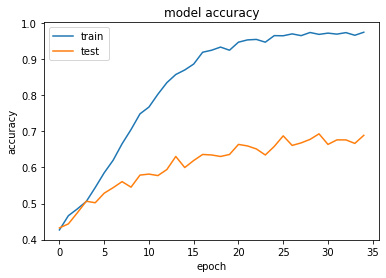

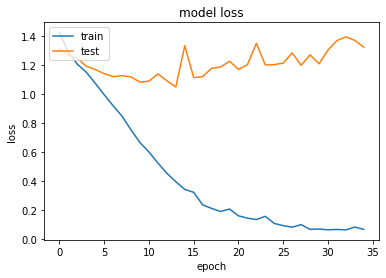

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
#Fine-tuning

model.add(Dense(5, 'sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions_one_hot = model.predict(inputs_test)
print(targets_test.shape, predictions_one_hot.shape)
# cm = confusion_matrix(targets_test, predictions_one_hot.argmax(axis=1))
# print(cm)
con_mat = tf.math.confusion_matrix(labels=targets_test, predictions=predictions_one_hot.argmax(axis=1)).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = [0,1,2,3,4], 
                     columns = [0,1,2,3,4])
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
signal, sr = librosa.load("../raw_dataset/files/BIG ROOM/01 Agus Zack _ Devbanz - Workout (Extended M.mp3") # len(signal) = 661794  # sr is 22050 by default 

In [ ]:
signal.shape[0]
mfcc = librosa.feature.mfcc(signal[0 : 22050*30],
                                                   sr = 22050,
                                                   n_fft = 4084,
                                                   n_mfcc = 13,
                                                   hop_length = 1024)
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# (rate,sig) = wav.read("file.wav")
mfcc_feat = mfcc

ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC')
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_feat)
plt.show()

In [ ]:
mfcc.shape

In [ ]:
model.save('model')